<a href="https://colab.research.google.com/github/klajosw/python/blob/master/kl_py_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Python graffikai lehetőségei topologia leírásra

## Szükséges modulok isnstallásása

In [0]:
## Colab alatt:
# !pip install plotly --upgrade  
# !pip install networkx --upgrade
# !pip install pydot --upgrade

## anaconda alatt
# conda install plotly 
# conda install networkx
# conda install pydot

Nodes of graph: ['0', '1', '2', '3', '4']
Edges of graph: [('0', '1'), ('0', '2'), ('0', '3'), ('1', '2'), ('2', '4'), ('3', '4')]


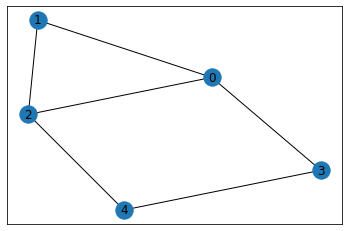

In [0]:
import networkx as nx

G=nx.Graph()
G.add_nodes_from(["0", "1", "2", "3", "4"])
G.add_edges_from([("0", "1"), ("1", "2"), ("2", "0"), ("0", "3"), ("2", "4"), ("3", "4")])

print("Nodes of graph: {}".format(G.nodes()))
print("Edges of graph: {}".format(G.edges()))

nx.draw_networkx(G)

In [0]:
m = nx.to_numpy_matrix(G)
print(m)

[[0. 1. 1. 1. 0.]
 [1. 0. 1. 0. 0.]
 [1. 1. 0. 0. 1.]
 [1. 0. 0. 0. 1.]
 [0. 0. 1. 1. 0.]]


\begin{pmatrix} 
0 & 1 & 1 & 1 & 0 \\
1 & 0 & 1 & 0 & 0 \\
1 & 1 & 0 & 0 & 1 \\
1 & 0 & 0 & 0 & 1 \\
0 & 0 & 1 & 1 & 0 \\
\end{pmatrix}


pos = graphviz_layout(G, prog='twopi') ## megadás

#### paraméter lehetőségek:
dot - filter for drawing directed graphs 
neato - filter for drawing undirected graphs 
twopi - filter for radial layouts of graphs 
circo - filter for circular layout of graphs 
fdp - filter for drawing undirected graphs 
sfdp - filter for drawing large undirected graphs 
patchwork - filter for tree maps


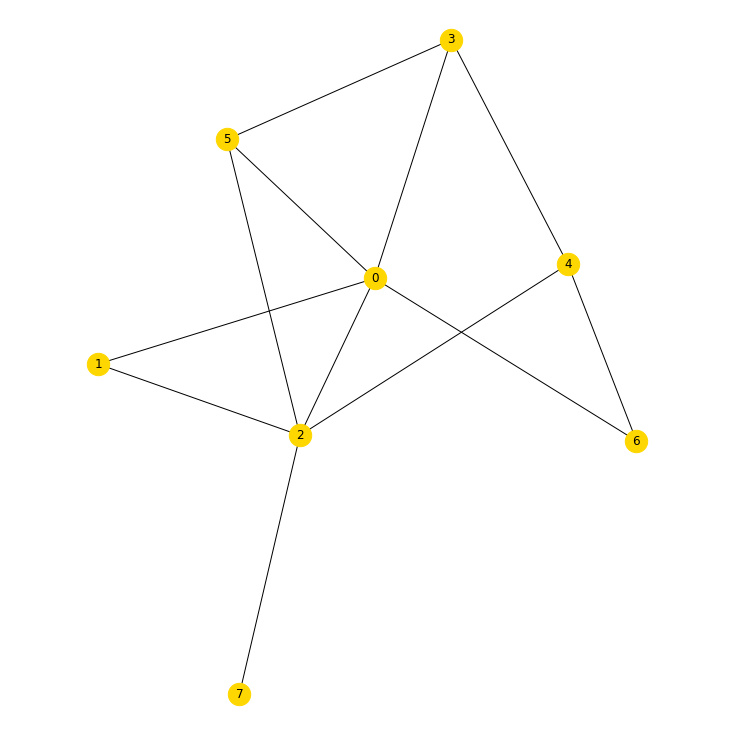

Nodes of graph: ['0', '1', '2', '3', '4', '5', '6', '7']
Edges of graph: [('0', '1'), ('0', '2'), ('0', '3'), ('0', '6'), ('0', '5'), ('1', '2'), ('2', '4'), ('2', '5'), ('2', '7'), ('3', '4'), ('3', '5'), ('4', '6')]
Vertices were visited in the following sequence: [0, 1, 2, 4, 3, 5, 6, 7]


In [0]:
import networkx as nx
import numpy as np

from networkx.drawing.nx_pydot import graphviz_layout
import matplotlib.pyplot as plt

def depth_first_search(v, m, visited_vertices, depth):
    padding = "  "
    if v not in visited_vertices:
#        print("{}visiting {}".format(padding*depth, v))
        visited_vertices.append(v)
        num_of_vertices = np.shape(m)[0]
#        print("{}visiting neighbours of {}".format(padding*depth, v))
        for j in range(0, num_of_vertices):
            if m[v,j] != 0:
#                print("{}stepping to edge ({}, {})".format(padding*depth, v, j))
                depth_first_search(j, m, visited_vertices, depth + 1)
    else:
        pass
#        print("{}{} was already visited".format(padding*depth, v))


G=nx.Graph()
G.add_nodes_from(["0", "1", "2", "3", "4", "5", "6", "7"])
G.add_edges_from([("0", "1"), 
                  ("1", "2"), 
                  ("2", "0"), 
                  ("0", "3"), 
                  ("2", "4"), 
                  ("3", "4"), 
                  ("0", "6"), 
                  ("4", "6"), 
                  ("2", "5"), 
                  ("3", "5"), 
                  ("0", "5"), 
                  ("2", "7")])

pos = graphviz_layout(G, prog='neato')
plt.figure(figsize=(10, 10))
nx.draw(G, pos, node_size=500, alpha=1, node_color="gold", with_labels=True)
plt.axis('equal')
plt.show()

print("Nodes of graph: {}".format(G.nodes()))
print("Edges of graph: {}".format(G.edges()))
visited_vertices = []
depth_first_search(0, nx.to_numpy_matrix(G), visited_vertices, 0)
print("Vertices were visited in the following sequence: {}".format(visited_vertices))

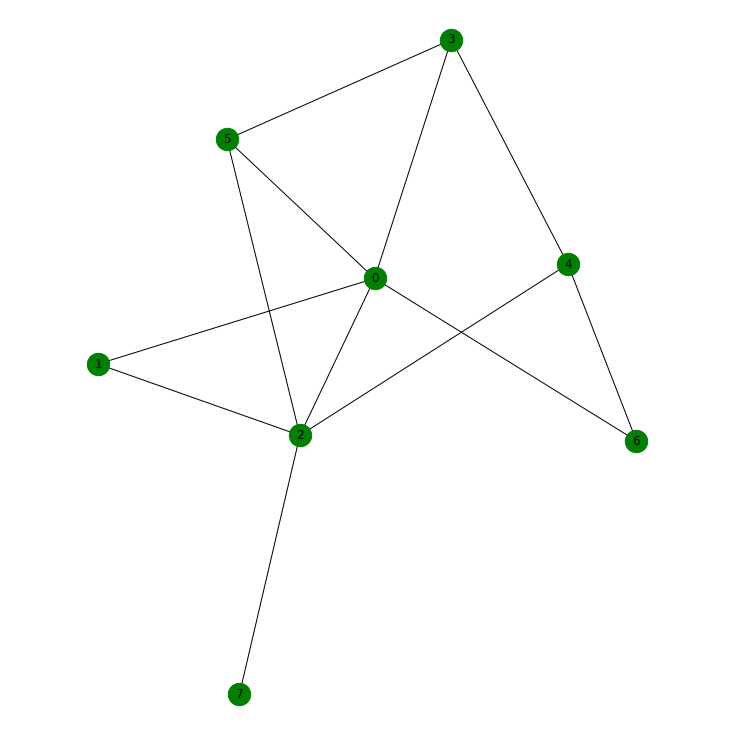

Nodes of graph: ['0', '1', '2', '3', '4', '5', '6', '7']
Edges of graph: [('0', '1'), ('0', '2'), ('0', '3'), ('0', '6'), ('0', '5'), ('1', '2'), ('2', '4'), ('2', '5'), ('2', '7'), ('3', '4'), ('3', '5'), ('4', '6')]
Vertices were visited in the following sequence: [0, 1, 2, 3, 5, 6, 4, 7]


In [0]:
import networkx as nx
import numpy as np
from networkx.drawing.nx_pydot import graphviz_layout
import matplotlib.pyplot as plt

def mark_as_visited(v, m, visited_vertices, to_be_visited_vertices):
    if v not in visited_vertices:
#        print("visiting {}".format(v))
        visited_vertices.append(v)
        num_of_vertices = np.shape(m)[0]
        for j in range(0, num_of_vertices):
            if m[v,j] != 0 and j not in visited_vertices:
                to_be_visited_vertices.append(j)
    else:
        pass
#        print("{} was already visited".format(v))

def breadth_first_search(v, m, visited_vertices):
    to_be_visited_vertices = []
    mark_as_visited(v, m, visited_vertices, to_be_visited_vertices)
    while len(to_be_visited_vertices) != 0:
        j = to_be_visited_vertices.pop(0)
        mark_as_visited(j, m, visited_vertices, to_be_visited_vertices)


G=nx.Graph()
G.add_nodes_from(["0", "1", "2", "3", "4", "5", "6", "7"])
G.add_edges_from([("0", "1"), 
                  ("1", "2"), 
                  ("2", "0"), 
                  ("0", "3"), 
                  ("2", "4"), 
                  ("3", "4"), 
                  ("0", "6"), 
                  ("4", "6"), 
                  ("2", "5"), 
                  ("3", "5"), 
                  ("0", "5"), 
                  ("2", "7")])

pos = graphviz_layout(G, prog='neato')
plt.figure(figsize=(10, 10))
nx.draw(G, pos, node_size=500, alpha=1, node_color="green", with_labels=True)
plt.axis('equal')
plt.show()

print("Nodes of graph: {}".format(G.nodes()))
print("Edges of graph: {}".format(G.edges()))
visited_vertices = []
breadth_first_search(0, nx.to_numpy_matrix(G), visited_vertices)
print("Vertices were visited in the following sequence: {}".format(visited_vertices))

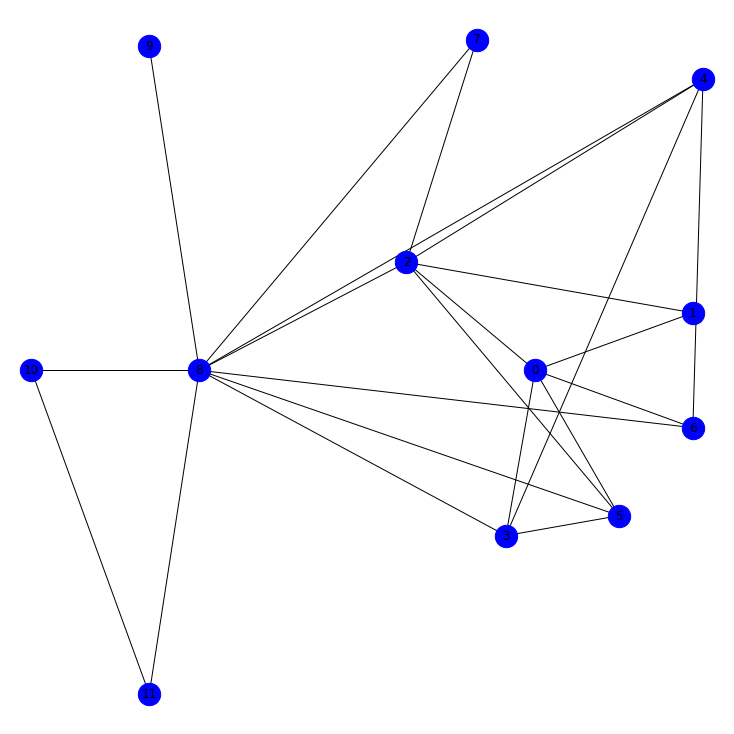

Nodes of graph: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']
Edges of graph: [('0', '1'), ('0', '2'), ('0', '3'), ('0', '6'), ('0', '5'), ('1', '2'), ('2', '4'), ('2', '5'), ('2', '7'), ('2', '8'), ('3', '4'), ('3', '5'), ('3', '8'), ('4', '6'), ('4', '8'), ('5', '8'), ('6', '8'), ('7', '8'), ('8', '9'), ('8', '10'), ('8', '11'), ('10', '11')]
Vertices were visited in the following sequence: [0, 1, 2, 3, 5, 6, 4, 7, 8, 9, 10, 11]


In [0]:
import networkx as nx
import numpy as np
from networkx.drawing.nx_pydot import graphviz_layout
import matplotlib.pyplot as plt

def mark_as_visited(v, m, visited_vertices, to_be_visited_vertices):
    if v not in visited_vertices:
#        print("visiting {}".format(v))
        visited_vertices.append(v)
        num_of_vertices = np.shape(m)[0]
        for j in range(0, num_of_vertices):
            if m[v,j] != 0 and j not in visited_vertices:
                to_be_visited_vertices.append(j)
    else:
         pass
#        print("{} was already visited".format(v))

def breadth_first_search(v, m, visited_vertices):
    to_be_visited_vertices = []
    mark_as_visited(v, m, visited_vertices, to_be_visited_vertices)
    while len(to_be_visited_vertices) != 0:
        j = to_be_visited_vertices.pop(0)
        mark_as_visited(j, m, visited_vertices, to_be_visited_vertices)


G=nx.Graph()
G.add_nodes_from(["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11"])
G.add_edges_from([("0", "1"), 
                  ("1", "2"), 
                  ("2", "0"), 
                  ("0", "3"), 
                  ("2", "4"), 
                  ("3", "4"), 
                  ("0", "6"), 
                  ("4", "6"), 
                  ("2", "5"), 
                  ("3", "5"), 
                  ("0", "5"), 
                  ("2", "7"),
                  ("7", "8"),
                  ("8", "2"),
                  ("8", "3"),
                  ("8", "4"),
                  ("8", "5"),
                  ("8", "6"),
                  ("8", "9"),
                  ("8", "10"),
                  ("8", "11"),
                  ("10", "11")])

pos = graphviz_layout(G, prog='twopi')
plt.figure(figsize=(10, 10))
nx.draw(G, pos, node_size=500, alpha=1, node_color="blue", with_labels=True)
plt.axis('equal')
plt.show()

print("Nodes of graph: {}".format(G.nodes()))
print("Edges of graph: {}".format(G.edges()))
visited_vertices = []
breadth_first_search(0, nx.to_numpy_matrix(G), visited_vertices)
print("Vertices were visited in the following sequence: {}".format(visited_vertices))

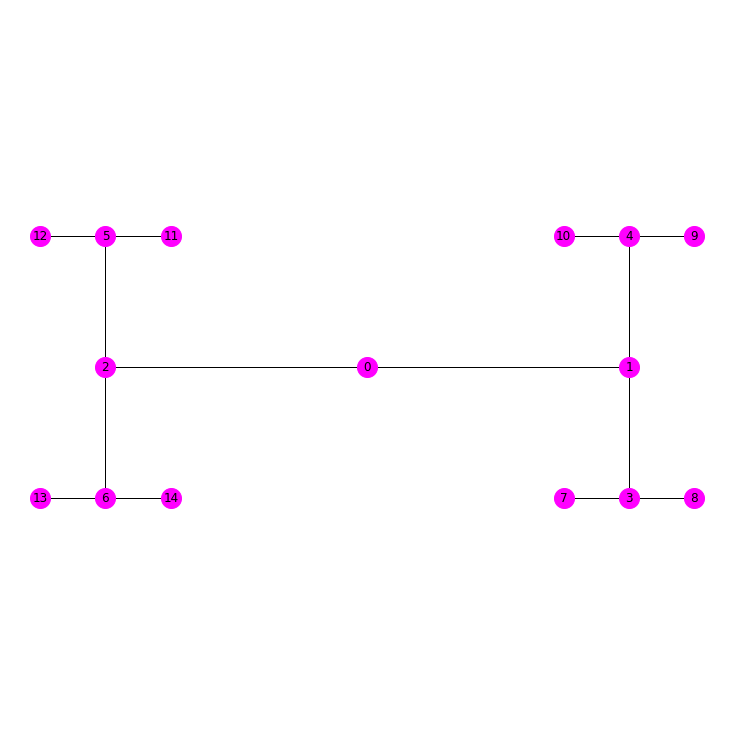

Nodes of graph: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
Edges of graph: [(0, 1), (0, 2), (1, 3), (1, 4), (2, 5), (2, 6), (3, 7), (3, 8), (4, 9), (4, 10), (5, 11), (5, 12), (6, 13), (6, 14)]
Vertices were visited in the following sequence: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


In [0]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
import numpy as np

def mark_as_visited(v, m, visited_vertices, to_be_visited_vertices):
#    print("visiting {}".format(v))
    visited_vertices.append(v)
    num_of_vertices = np.shape(m)[0]
    for j in range(0, num_of_vertices):
        if m[v,j] != 0 and j not in visited_vertices:
            to_be_visited_vertices.append(j)

def breadth_first_search(v, m, visited_vertices):
    to_be_visited_vertices = []
    mark_as_visited(v, m, visited_vertices, to_be_visited_vertices)
    while len(to_be_visited_vertices) != 0:
        j = to_be_visited_vertices.pop(0)
        mark_as_visited(j, m, visited_vertices, to_be_visited_vertices)

G = nx.balanced_tree(2, 3)
pos = graphviz_layout(G, prog='circo') ##'twopi')
plt.figure(figsize=(10, 10))
nx.draw(G, pos, node_size=400, alpha=1, node_color="magenta", with_labels=True)
plt.axis('equal')
plt.show()

print("Nodes of graph: {}".format(G.nodes()))
print("Edges of graph: {}".format(G.edges()))
visited_vertices = []
breadth_first_search(0, nx.to_numpy_matrix(G), visited_vertices)
print("Vertices were visited in the following sequence: {}".format(visited_vertices))

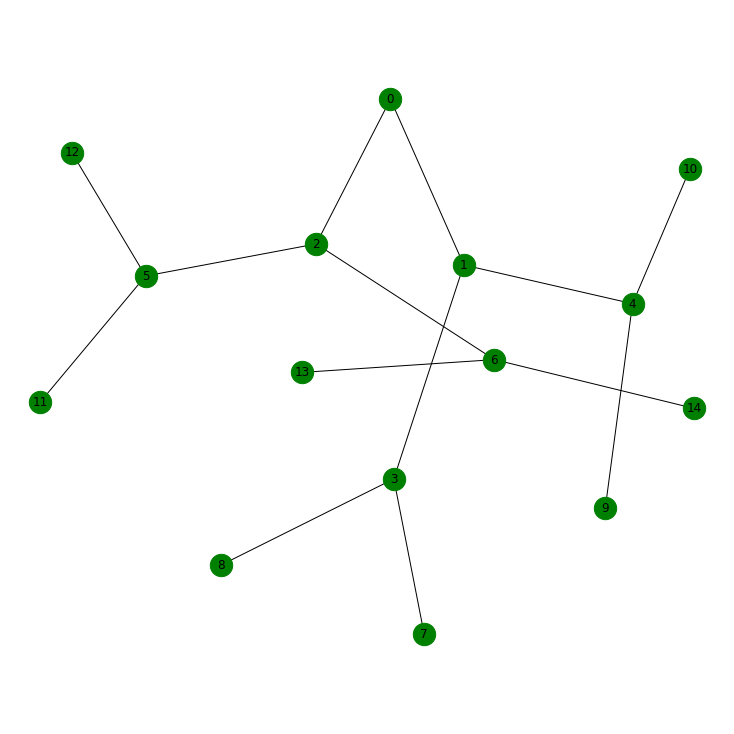

Nodes of graph: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
Edges of graph: [(0, 1), (0, 2), (1, 3), (1, 4), (2, 5), (2, 6), (3, 7), (3, 8), (4, 9), (4, 10), (5, 11), (5, 12), (6, 13), (6, 14)]
Vertices were visited in the following sequence: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


In [0]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
import numpy as np

def mark_as_visited(v, m, visited_vertices, to_be_visited_vertices):
#    print("visiting {}".format(v))
    visited_vertices.append(v)
    num_of_vertices = np.shape(m)[0]
    for j in range(0, num_of_vertices):
        if m[v,j] != 0 and j not in visited_vertices:
            to_be_visited_vertices.append(j)

def breadth_first_search(v, m, visited_vertices):
    to_be_visited_vertices = []
    mark_as_visited(v, m, visited_vertices, to_be_visited_vertices)
    while len(to_be_visited_vertices) != 0:
        j = to_be_visited_vertices.pop(0)
        mark_as_visited(j, m, visited_vertices, to_be_visited_vertices)

G = nx.balanced_tree(2, 3)
pos = graphviz_layout(G, prog='fdp')
plt.figure(figsize=(10, 10))
nx.draw(G, pos, node_size=500, alpha=1, node_color="green", with_labels=True)
plt.axis('equal')
plt.show()

print("Nodes of graph: {}".format(G.nodes()))
print("Edges of graph: {}".format(G.edges()))
visited_vertices = []
breadth_first_search(0, nx.to_numpy_matrix(G), visited_vertices)
print("Vertices were visited in the following sequence: {}".format(visited_vertices))

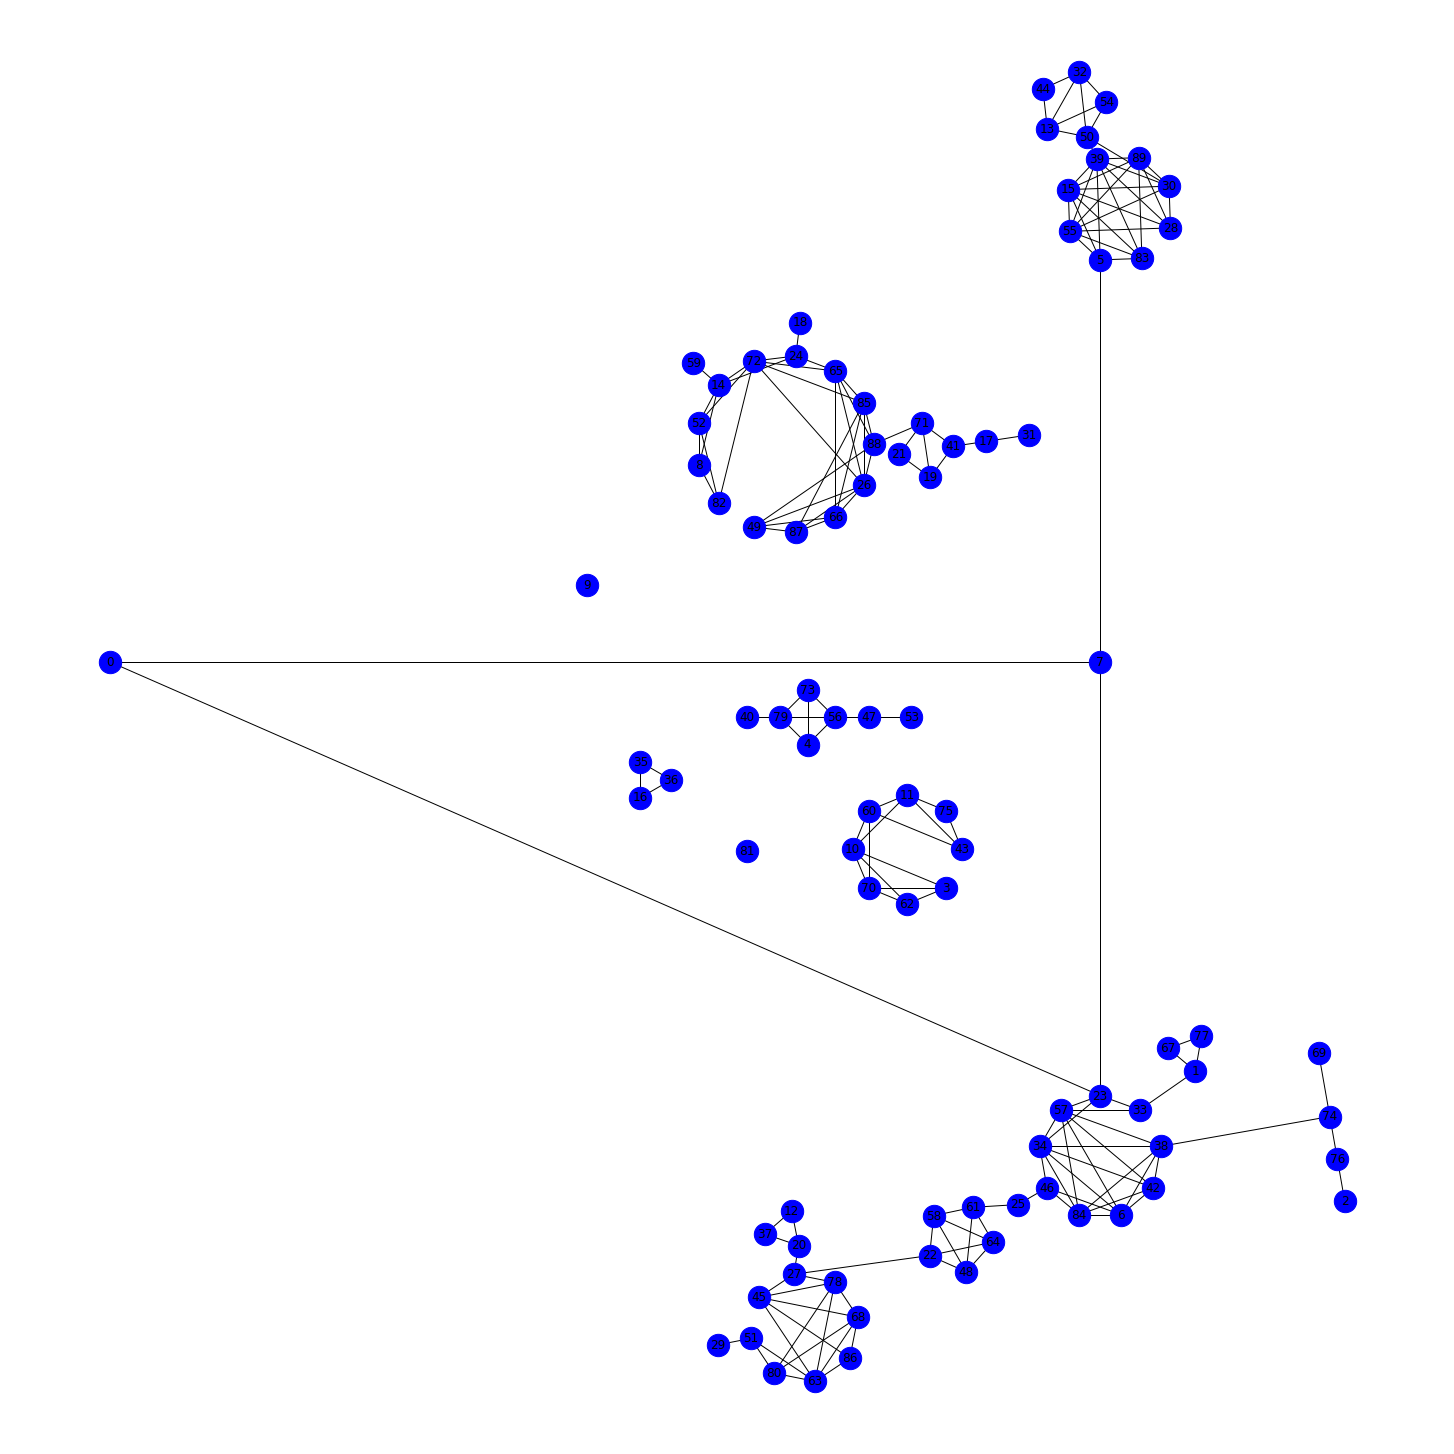

In [0]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.random_geometric_graph(90, 0.125)
pos = graphviz_layout(G, prog='circo')
plt.figure(figsize=(20, 20))
nx.draw(G, pos, node_size=500, alpha=1, node_color="blue", with_labels=True)
plt.axis('equal')
plt.show()